In [1]:
import pandas as pd

In [2]:
# This problem has the following inputs:
# 1. Frequency, in Hertzs.
# 2. Angle of attack, in degrees.
# 3. Chord length, in meters.
# 4. Free-stream velocity, in meters per second.
# 5. Suction side displacement thickness, in meters.

# The only output is:
# 6. Scaled sound pressure level, in decibels.

In [3]:
df = pd.read_csv('airfoil_self_noise.dat',sep = "\t" , header=None)

In [4]:
df.head()

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [5]:
df.columns = ["Frequency" ,"Angle of attack", "Chord length", "Free-stream velocity","Suction side","sound pressure level"] 

In [6]:
df

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side,sound pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [7]:
df.isnull().sum()

Frequency               0
Angle of attack         0
Chord length            0
Free-stream velocity    0
Suction side            0
sound pressure level    0
dtype: int64

In [8]:
# Dependent variable and independent veriable

In [9]:
X = df.iloc[:,:-1] # Independent Veriable
y = df.iloc[:,-1]  # Dependent Veriable

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
X_train

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side
845,500,11.2,0.0508,71.3,0.014072
1026,10000,4.8,0.0254,55.5,0.000873
621,2000,7.2,0.1524,39.6,0.009092
1371,630,6.7,0.1016,31.7,0.005929
195,6300,0.0,0.2286,71.3,0.002143
...,...,...,...,...,...
1130,250,12.7,0.0254,39.6,0.013025
1294,800,3.3,0.1016,71.3,0.002028
860,630,11.2,0.0508,39.6,0.015048
1459,315,12.3,0.1016,31.7,0.041876


In [13]:
import seaborn as sns


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

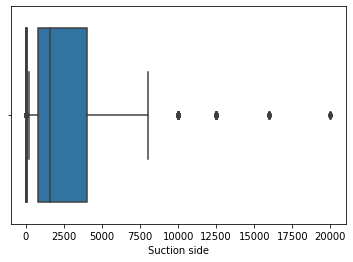

In [14]:
for i in X_train.columns:
  sns.boxplot(X_train[i])

In [15]:
len(df["sound pressure level"].unique())

1456

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
standardization = StandardScaler()

In [18]:
X_train_scaled = standardization.fit_transform(X_train)
X_test_scaled = standardization.fit_transform(X_test)

In [19]:
# X_train_scaled
# X_test_scaled

In [65]:
dict_result = {"r2_accuracy_linear":[],"r2_accuracy_ridge":[],"r2_accuracy_srv":[],"accuracy_random_forest":[]}

In [66]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled,y_train)
# y_pred = regressor.predict(X_test)
y_pred_scaled = regressor.predict(X_test_scaled)
# y_pred_scaled


In [67]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test,y_pred_scaled)
r2_score_result = {"r2_accuracy_linear":accuracy}
dict_result["r2_accuracy_linear"] = accuracy


In [68]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [69]:
parameters = {'alpha':[1e-15,1e-3,1e-2,1,5,10,15]}
ridge_regressor = Ridge()
ridge = GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error' ,cv=5)
ridge.fit(X_train_scaled,y_train)
y_pred_scale_ridge = ridge.predict(X_test_scaled)

In [70]:
accuracy_ridge = r2_score(y_test,y_pred_scale_ridge)
r2_score_result = {"r2_accuracy_ridge":accuracy_ridge}
dict_result["r2_accuracy_ridge"] = accuracy_ridge

In [71]:
from sklearn.svm import SVR
svr_model = SVR()
svr_model.fit(X_train_scaled,y_train)
y_pred_svr = svr_model.predict(X_test_scaled)
accuracy_svr = r2_score(y_test,y_pred_svr)
dict_result["r2_accuracy_srv"] = accuracy_svr

In [72]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=2)
random_forest.fit(X_train,y_train)
accuracy_random_forest = random_forest.score(X_test,y_test)
dict_result["accuracy_random_forest"] = accuracy_random_forest

In [73]:
y_pred_random_forest = random_forest.predict(X_test)


In [74]:
dict_result

{'accuracy_random_forest': 0.8435944091611822,
 'r2_accuracy_linear': 0.5012711810276826,
 'r2_accuracy_ridge': 0.5011047961227191,
 'r2_accuracy_srv': 0.6754813425733526}

In [75]:
import pickle

In [77]:
pickle.dump(random_forest,open('model.pkl','wb'))

In [ ]:
pickled_model = pickle.load(open('model.pkl','rb'))
pickled_model.predict(X_test)

In [ ]:
pip list